# Parts of Speech and Meaning (English Only)

In [1]:
text = '''A ray cat is a proposed type of cat that would be genetically engineered
          to change appearance in the presence of nuclear radiation. This innovative
          idea was suggested by philosophers Françoise Bastide and Paolo Fabbri in 1984.'''

## 1. Tokenization

In [2]:
from nltk import sent_tokenize, word_tokenize

sentences = sent_tokenize(' '.join([line.lstrip() for line in text.split('\n')]))
sentences

['A ray cat is a proposed type of cat that would be genetically engineered to change appearance in the presence of nuclear radiation.',
 'This innovative idea was suggested by philosophers Françoise Bastide and Paolo Fabbri in 1984.']

In [3]:
tokens = word_tokenize(sentences[1])
tokens

['This',
 'innovative',
 'idea',
 'was',
 'suggested',
 'by',
 'philosophers',
 'Françoise',
 'Bastide',
 'and',
 'Paolo',
 'Fabbri',
 'in',
 '1984',
 '.']

## 2. POS Tagging

This time, we will use NLTK’s recommended tagger, `pos_tag`, to tag our tokens.

In [4]:
from nltk import pos_tag

tags = pos_tag(tokens)
tags

[('This', 'DT'),
 ('innovative', 'JJ'),
 ('idea', 'NN'),
 ('was', 'VBD'),
 ('suggested', 'VBN'),
 ('by', 'IN'),
 ('philosophers', 'NNS'),
 ('Françoise', 'NNP'),
 ('Bastide', 'NNP'),
 ('and', 'CC'),
 ('Paolo', 'NNP'),
 ('Fabbri', 'NNP'),
 ('in', 'IN'),
 ('1984', 'CD'),
 ('.', '.')]

To access documentation for tags, for example, for `NN`:

In [5]:
import nltk.help

nltk.help.upenn_tagset('NN')

NN: noun, common, singular or mass
    common-carrier cabbage knuckle-duster Casino afghan shed thermostat
    investment slide humour falloff slick wind hyena override subhumanity
    machinist ...


## 3. Word senses (for homonyms)

**WordNet**, which we touched on in [Notebook 3.1](3-1-Bigrams-Stemming-and-Lemmatizing.ipynb), is a lexical database for the English language in the form of a semantic graph. 

WordNet groups English words into sets of synonyms called synsets, provides short definitions and usage examples, and records relations among these synonym sets or their members.

NLTK provides an interface to the WordNet API.

In [6]:
from nltk.corpus import wordnet as wn

wn.synsets('human')

[Synset('homo.n.02'),
 Synset('human.a.01'),
 Synset('human.a.02'),
 Synset('human.a.03')]

In [7]:
wn.synsets('human')[0].definition()

'any living or extinct member of the family Hominidae characterized by superior intelligence, articulate speech, and erect carriage'

In [8]:
wn.synsets('human')[1].definition()

'characteristic of humanity'

In [9]:
human = wn.synsets('Human', pos=wn.NOUN)[0]
human

Synset('homo.n.02')

A **hypernym** is a category into which words with more specific meanings fall; a superordinate. For example, color is a hypernym of red. WordNet also provides hypernyms:

In [10]:
human.hypernyms()

[Synset('hominid.n.01')]

In [11]:
human.hyponyms()

[Synset('homo_sapiens.n.01'),
 Synset('neandertal_man.n.01'),
 Synset('homo_erectus.n.01'),
 Synset('rhodesian_man.n.01'),
 Synset('homo_habilis.n.01'),
 Synset('homo_soloensis.n.01'),
 Synset('world.n.08')]

In [12]:
bike = wn.synsets('bicycle')[0]
bike

Synset('bicycle.n.01')

In [13]:
girl = wn.synsets('girl')[1]
girl

Synset('female_child.n.01')

There are many metrics for measuring similarity between words based on the distance between them in the graph. The **Wu-Palmer metric (WUP)** is a popular one.

In [14]:
bike.wup_similarity(human)

0.34782608695652173

In [15]:
girl.wup_similarity(human)

0.5217391304347826

Word synonyms and antonyms:

In [16]:
synonyms = []
for syn in wn.synsets('girl'):
    for lemma in syn.lemmas():
        synonyms.append(lemma.name())
synonyms

['girl',
 'miss',
 'missy',
 'young_lady',
 'young_woman',
 'fille',
 'female_child',
 'girl',
 'little_girl',
 'daughter',
 'girl',
 'girlfriend',
 'girl',
 'lady_friend',
 'girl']

In [17]:
antonyms = []
for syn in wn.synsets("girl"):
    for l in syn.lemmas():
        if l.antonyms():
            antonyms.append(l.antonyms()[0].name())
antonyms

['male_child', 'boy', 'son', 'boy']

## 4. Chunking and Entity Recognition

The goal of **chunking** is to divide a sentence into chunks. Usually, each chunk contains a **head** and, optionally, additional words and modifiers. Examples of chunks include noun groups and verb groups.

### 4.1. Chunking

In [18]:
from nltk.chunk import RegexpParser

To create a chunker, we need to define a **chunk grammar** with rules that indicate how sentences should be chunked. 

We can define a simple grammar for a noun phrase (NP) chunker with a single regular-expression rule. This rule says that a noun phrase chunk should be formed whenever the chunker finds an optional determiner (`DT`) followed by any number of adjectives (`JJ`) and then a noun (`NN`).

Note how grammatical structures that are not noun phrases will not be chunked, which is totally fine.

In [19]:
grammar = "NP: {<DT>?<JJ>*<NN>}"

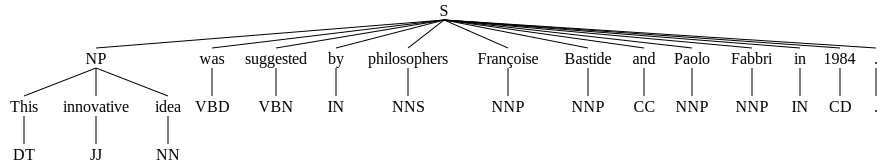

In [20]:
chunker = RegexpParser(grammar)
result = chunker.parse(tags)
result

### 4.2. Entity Recognition

The goal of entity recognition is to detect an entity, such as a person, location, time, etc. NLTK’s `ne_chunk` is trained to recognize **named entities** under these categories:

> Facility, GPE (geo-political entity), GSP (geo-socio-political group), location, organization, person 

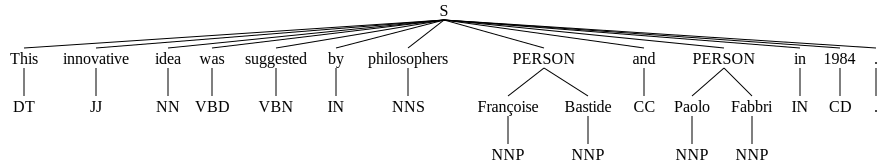

In [21]:
from nltk.chunk import ne_chunk

ne_chunk(tags)

`ne_chunk` was unable to detect the named entities “Françoise Bastide” and “Paolo Fabbri”. It was probably only trained on English-language names.